# Exploring Lotka-Volterra predator-prey equation behavior
- Please answer the self-test questions at the end of the exercise. If you're unsure about the answers, you can modify the code below to check your intuition. If still unsure, see Sasha at the lecture.

## Learning objectives
- Understand what phase portraits of differential equation systems tell us
- Using a vector field plot, approximate the trajectory of a system of differential equations
- Understand what behaviors characterize zero-growth isoclines

In [1]:
library(phaseR)
library(deSolve)
library(tidyverse)
options(repr.plot.width=6, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


As you remember from the lecture the Lotka-Volterra logistic equation is written as
$$\frac{dX}{dt} = a  X - b  X Y$$

$$\frac{dY}{dt} = c X Y - d Y $$

Where X is the prey and Y is the predator. We'll re-write it as an R function. Don't worry about its contents too much, but glancing at the code you should see that it accepts parameters as above (a, b, c and d) and computes the derivative.

In [2]:
predator_prey <- function(t, y, parameters) {
  # calculates dx/dt and dy/dt for a predator-prey model
  
  # t: time at which to evaluate derivatives
  # y: vector of system variables (c(X, Y))
  # parameters: vector of model parameters (c(a, b, c, d))
  
  # the arguments need to be named "t", "y", and "parameters", otherwise this won't work with phaseR, a package we will use later
    
  #now the state vector y has two elements because we have two species
  X <- y[1] # prey
  Y <- y[2] # predators
  
  a <- parameters['a']
  b <- parameters['b']
  c <- parameters['c']
  d <- parameters['d']
    
  # calculate rate of change
  dx <- a * X - b * Y * X
  dy <- c * X * Y - d * Y
  
  # return rate of change
  return(list(c(dx, dy)))
}

Now, well solve this function using the `ode` solver and plot the results using ggplot2

In [3]:
parameters <- c(a = 0.5, b = 0.6, c = 0.5, d = 0.5)
state <- c(X = .5, Y = .5)
times <- seq(0, 50, by = 0.01) # the timestep dt is chosen by setting the increment with 'by'

#?ode # look at the documentation to learn about the parameters
result <- as.data.frame(ode(y = state, times = times, func = predator_prey, parms = parameters))
head(result)

time,X,Y
<dbl>,<dbl>,<dbl>
0.00,0.5000000,0.5000000
0.01,0.5010029,0.4987528
0.02,0.5020115,0.4975112
0.03,0.5030259,0.4962753
0.04,0.5040461,0.4950449
0.05,0.5050721,0.4938201


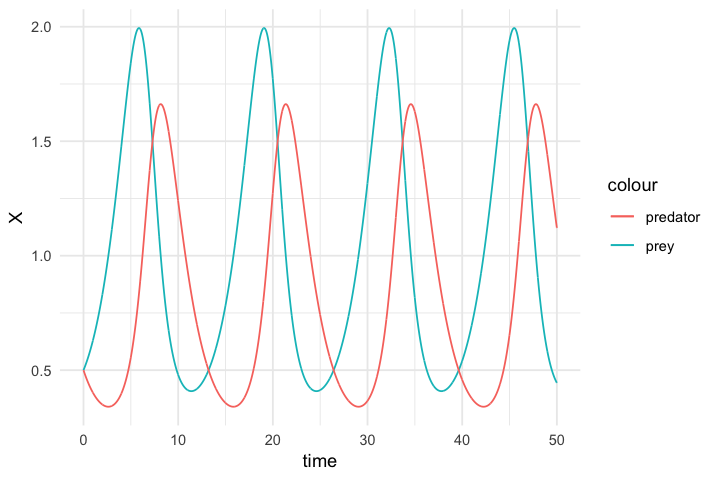

In [4]:
# note that we saved the output of the plot as a variable p for use later
(p = ggplot(result, aes(time, X, color = "prey")) + geom_line() + 
geom_line(aes(time, Y, color = "predator")) + theme_minimal()) 


## Dynamic plots of predators and prey

Using the `gganimate` libarary, we can make this plot animated, which makes it a bit easier to visualize

We won't run this code, because it takes a while and doesn't run particularly well on Binder, but we can animate the behavior of predators and prey
```
library(gganimate)
p + ylab("number of individuals") + transition_reveal(time) + anim_save('time.gif')
```

![](./time.gif)

We can also look at the the **phase portrait** of the equation, which plots one of the variables against each other

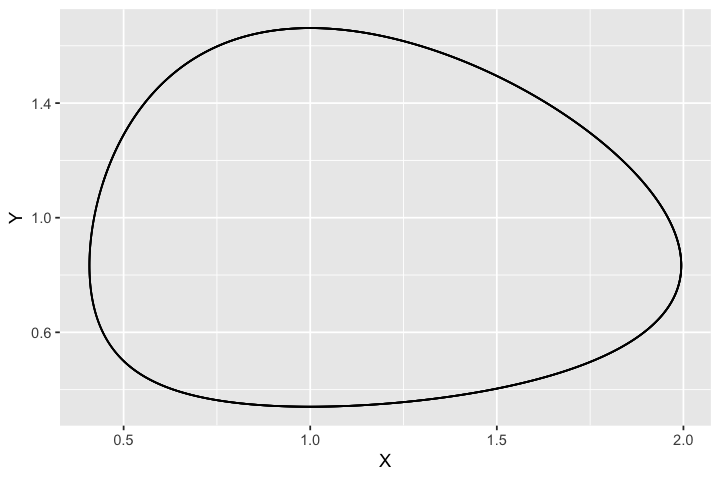

In [5]:
ggplot(result, aes(X, Y)) + geom_path()

This plot show us the possible states of predators and prey in this model, a closed circle indicates stable oscillations.

We can use the `phaseR` package to plot trajectories and vector fields for the same set of data. You ignore most of the the code below, just understand what it does. The `flowField` function takes the the `parameters` argument, which defines the equation and plots the flow field (the little arrows). The `trajectory` function also take parameters and a starting point `y0`, which is the initial number of predators and prey.

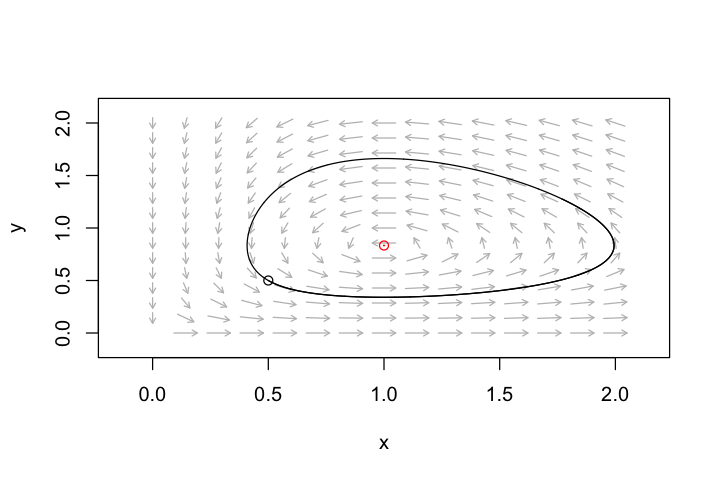

In [9]:
# plot vector field: on a grid of points, plot an arrow in the direction of dx/dt and dy/dt
pp_flowField <- flowField(predator_prey, xlim = c(0, 2), ylim = c(0, 2),
                          parameters = parameters, # same parameters as before,
                          points = 15, # this is the density of grid points on which to plot arrows
                          system = 'two.dim', # 'two.dim' is default
                          add = FALSE)

# add trajectories
pp_trajectory <- trajectory(predator_prey, 
                            # y0 is a matrix where each row is pairs of (X, Y) 
                            y0 = state, 
                            tlim = c(0,20), # how far in time to calculate the trajectories
                            parameters = parameters, system = "two.dim")

# compute isocline for this paramer set
predator <- parameters[['a']]/parameters[['b']]
prey <- parameters[['c']]/parameters[['d']]

pp_trajectory <- trajectory(predator_prey, 
                            # y0 is a matrix where each row is pairs of (X, Y) 
                            y0 = c(prey, predator), 
                            tlim = c(0,20), # how far in time to calculate the trajectories
                            parameters = parameters, system = "two.dim", col = "red")

Note that in the middle of the circle, there is a red point where the populations are not changed. This is the *joint equilibrium point*, which is the point at which neither 

**Question 1:** In the first equation system defined by parameters  c(a = 0.5, b = 0.6, c = 0.5, d = 0.5), is there another equilibrium point?

**Question 2:** If you change the starting numbers of predators and prey, will the model still have cycles of the same amplitude?

**Question 3:** You plot the population sizes of predators and prey vs time starting at the joint equilibrium point, what would they look like?

### Questions 4 through 5 refer to the same plot below.

**Question 4**: We'll start with two different starting points, which are provided to the trajectory plotting function as two sets of rows. One start point is X=1, Y=2, plotted in red, and the other id X=8, Y=3, plotted in black. Which of these states has the greatest amplitude of the cycles?

In [7]:
y0 = matrix(c(1,2, 8, 3), ncol = 2, byrow = TRUE)
y0

1,2
8,3


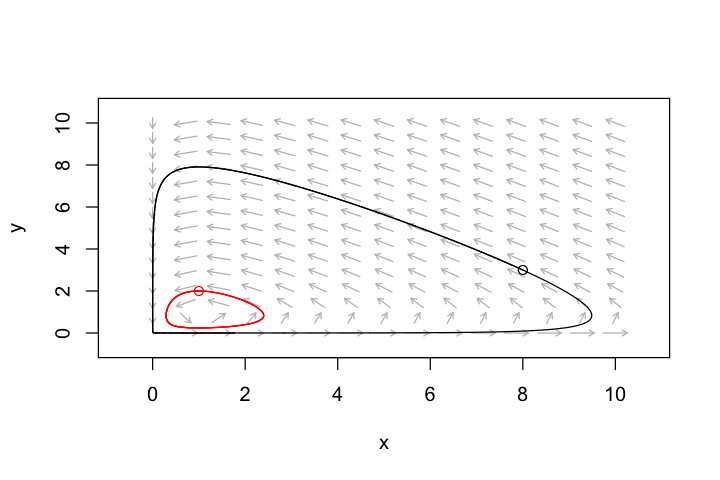

In [8]:
# plot vector field: on a grid of points, plot an arrow in the direction of dx/dt and dy/dt

pp_flowField <- flowField(predator_prey, xlim = c(0, 10), ylim = c(0, 10),
                          parameters = parameters, # same parameters as before,
                          points = 15, # this is the density of grid points on which to plot arrows
                          system = 'two.dim', # 'two.dim' is default
                          add = FALSE)

# add trajectories
pp_trajectory <- trajectory(predator_prey, 
                            y0 = y0, 
                            tlim = c(0,50), # how far in time to calculate the trajectories
                            parameters = parameters, system = "two.dim", col = c("red", "black"))

**Question 5** If we started at X=4, Y=2, would we have larger or smaller oscillations than the black trajectory?